In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [42]:
# Load data into DataFrame
df = pd.read_csv("database.txt", sep=',', header=None, names=['pitch', 'roll', 'yaw', 'timestamp'])
df.head()

,pitch,roll,yaw,timestamp
0,0.000000,0.000000,0.00000,15:57:12:945
1,-52.654250,-1.685466,-135.39719,15:57:13:166
2,-52.369420,-1.668458,-135.14746,15:57:13:271
3,-53.019505,-1.029275,-135.96890,15:57:13:323
4,-52.985058,-0.911930,-136.09015,15:57:13:402


In [43]:
# # Convert timestamp to seconds
df['timestamp'] = df['timestamp'].apply(lambda x: int(x.split(':')[2]))

In [45]:
df['timestamp']
# # Extract only the second component
# df['second'] = df['timestamp'].dt.second
df.head()


# Define sensing intervals
sensing_intervals = [13, 15]  # in seconds


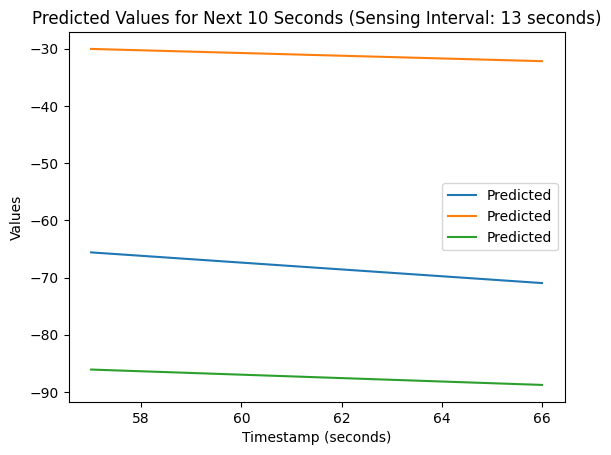

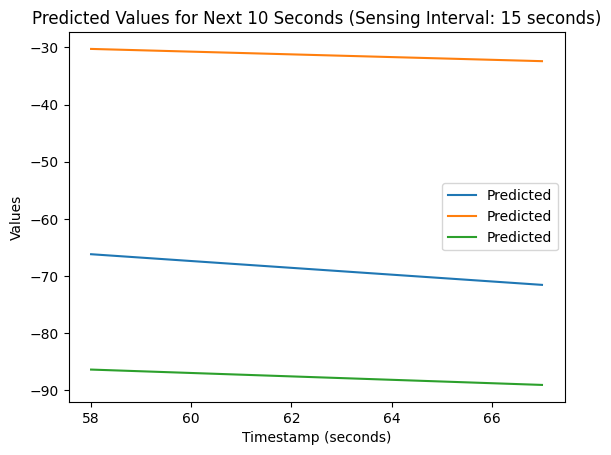

In [46]:

for interval in sensing_intervals:
    # Downsample data based on sensing interval
    downsampled_df = df[df.index % interval == 0]

    # Predict next 10 seconds of data
    X_pred = pd.DataFrame({'timestamp': range(downsampled_df['timestamp'].max() + 1, downsampled_df['timestamp'].max() + 11)})
    y_pred = model.predict(X_pred)

    # Plot predicted vs actual values
    plt.plot(range(downsampled_df['timestamp'].max() + 1, downsampled_df['timestamp'].max() + 11), y_pred, label='Predicted')
    plt.title("Predicted Values for Next 10 Seconds (Sensing Interval: {} seconds)".format(interval))
    plt.xlabel("Timestamp (seconds)")
    plt.ylabel("Values")
    plt.legend()
    plt.show()